# Draft analysis 

---

Group name:

---


## Introduction

*This section includes an introduction to the project motivation, data, and research question. Include a data dictionary* 

In the last 30 years, the dating approach has changed and has become increasingly difficult. The willingness to date has decreased, dating is too expensive and time consuming, we have too many (perceived) options to date someone and we struggle because of accepting too easily negative sex stereotypes. In the 19th century, a custom in the United States called New Year’s Calling, was that on New Year's Day many young, single women would hold an Open House (a party or reception during which a person's home is open to visitors) on 1 January where they would invite eligible bachelors, both friends and strangers, to stop by for a brief (no more than 10–15-minute) visit. This custom was established with the term SpeedDating as a registered trademark by Aish HaTorah, who began hosting SpeedDating events in 1998. 

10 years later, Fisman et al. conducted a survey regarding speed dating habits and collected 8,000 observations during his 2 – year observation in his paper Gender Differences in Mate Selection: Evidence from a Speed Dating Experiment. Because speed dating has become more and more interesting in the last few years and also through Corona a completely new dating approach has emerged, we want to discuss contexts in speed dating. With the data from this survey, we want to answer the following research questions:

TODO:
-   What are the most effective characteristics to achieve a match in opposite sex speed dating?

To answer our research question, we defined the following sub-questions to strengthen our main research question:

-   Do specific characteristics affect the match selection of the survey participants?
-   Do these specific characteristics occur in both sexes?
-   What type of persons participate in speed dating events?
-   After three weeks, how many contacts did each type of person have?
-   Is there a significant difference between the number of men calling women or women calling men after three weeks?

The following hypotheses support our research question:

Null hypothesis: 
-   There is no affection of having specific characteristics regarding match selection of the survey participants
-   There is no correlation between shared interests, attributes and getting a match

Hypotheses:
-   Survey participants who both have the specific characteristics samerace and opposite gender tend to achieve more matches
-   Survey participants with a higher income tend to achieve more matches than survey participants with a lower income
-   Achieving matches because of having the same specific characteristics occur in both sexes
-   Three weeks after the event, males called women more often

## Data dictionary
### General information

| Name     | Description                                                                                                         | Role      | Type    | Format   |
|----------|---------------------------------------------------------------------------------------------------------------------|-----------|---------|----------|
| iid      | Unique subject number (wave + id + gender)                                                                          | ID        | numeric | int      |
| id       | Subject number within wave                                                                                          | ID        | numeric | int      |
| gender   | Gender of the person. Female = 0, Male = 1                                                                          | predictor | nominal | category |
| idg      | Subject number within gender (id + gender)                                                                          | ID        | numeric | int      |
| condtn   | Condition of the wave, 1 = Limited choice, 2 = extensive choice                                                     | predictor | nominal | category |
| wave     | ID of the event                                                                                                     | ID        | numeric | int      |
| round    | Number of people that met in wave                                                                                   | predictor | numeric | int      |
| position | Station number where met partner                                                                                    | predictor | numeric | int      |
| positin1 | Station number where started                                                                                        | predictor | numeric | int      |
| order    | The number of date that night when met partner                                                                      | predictor | numeric | int      |
| partner  | Partner's ID number the night of event                                                                              | ID        | numeric | int      |
| pid      | Partner's IID number                                                                                                | ID        | numeric | int      |
| match    | 1 = yes, 0 = no                                                                                                     | response  | nominal | category |
| int_corr | Correlation between participant's and partner's ratings of interests in Time 1                                      | predictor | numeric | float    |
| samerace | Participant and the partner were the same race. 1 =  yes, 0 = no                                                    | predictor | nominal | category |
| age_o    | Age of partner                                                                                                      | predictor | nominal | category |
| race_o   | Race of partner                                                                                                     | predictor | nominal | category |
| pf_o_att | Partner's stated preference at Time 1. The sum of all pf_o_ elements must be 100.                                   | predictor | numeric | float    |
| pf_o_sin | Partner's stated preference at Time 1. The sum of all pf_o_ elements must be 100.                                   | predictor | numeric | float    |
| pf_o_int | Partner's stated preference at Time 1. The sum of all pf_o_ elements must be 100.                                   | predictor | numeric | float    |
| pf_o_fun | Partner's stated preference at Time 1. The sum of all pf_o_ elements must be 100.                                   | predictor | numeric | float    |
| pf_o_amb | Partner's stated preference at Time 1. The sum of all pf_o_ elements must be 100.                                   | predictor | numeric | float    |
| pf_o_sha | Partner's stated preference at Time 1. The sum of all pf_o_ elements must be 100.                                   | predictor | numeric | float    |
| dec_o    | Decision of partner the night of event                                                                              | predictor | nominal | category |
| attr_o   | Attractive. Rating by partner the night of the event from 1 (awful) to 10 (great)                                   | predictor | numeric | int      |
| sinc_o   | Sincere. Rating by partner the night of the event from 1 (awful) to 10 (great)                                      | predictor | numeric | int      |
| intel_o  | Intelligent. Rating by partner the night of the event from 1 (awful) to 10 (great)                                  | predictor | numeric | int      |
| fun_o    | Fun. Rating by partner the night of the event from 1 (awful) to 10 (great)                                          | predictor | numeric | int      |
| amb_o    | Ambitious. Rating by partner the night of the event from 1 (awful) to 10 (great)                                    | predictor | numeric | int      |
| shar_o   | Shared Interests/Hobbies. Rating by partner the night of the event from 1 (awful) to 10 (great)                     | predictor | numeric | int      |
| like_o   | Overall, how much do oyu like this person. 1 (don't like at all) to 10 (like a lot)                                 | predictor | numeric | int      |
| prob_o   | How probable do you think it is that this person will say 'yes' for you? 1 (not probable) to 10 (extemely probable) | predictor | numeric | int      |
| met_o    | Have you met this person before? (1 = yes, 2 = no)                                                                  | predictor | ordinal | category |

### Time 1: Survey filled out by students that are interested in participating in order to register for the event

| Name      | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | Role      | Type    | Format   |
|-----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------|---------|----------|
| age       | Age of the person                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                | predictor | numeric | int      |
| field     | Field of study                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   | predictor | nominal | string   |
| field_cd  | Field of study coded.<br/>1= Law<br/>2= Math<br/>3= Social Science, Psychologist<br/>4= Medical Science, Pharmaceuticals, and Bio Tech<br/>5= Engineering<br/>6= English/Creative Writing/ Journalism<br/>7= History/Religion/Philosophy<br/>8= Business/Econ/Finance<br/>9= Education, Academia<br/>10= Biological Sciences/Chemistry/Physics<br/>11= Social Work<br/>12= Undergrad/undecided<br/>13=Political Science/International Affairs<br/>14=Film<br/>15=Fine Arts/Arts Administration<br/>16=Languages<br/>17=Architecture<br/>18=Other | predictor | nominal | category |
| mn_sat    | Median SAT score for the undergraduate institution where attended. Proxy for intelligence.                                                                                                                                                                                                                                                                                                                                                                                                                                                       |           |         |          |
| tuition   | Tuition listed for each response to undergrad                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |           |         |          |
| race      | Race of the attendee<br/>1 = Black/African American<br/>2 = European/Caucasian-American<br/>3 = Latino/Hispanic American<br/>4 = Asian/Pacific Islander/Asian-American<br/>5 = Native American<br/>6 = Other                                                                                                                                                                                                                                                                                                                                     | predictor | nominal | category |
| imprace   | How important is it that a person you date be of the same racial/ethic background? (1 - 10)                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | numeric | int      |
| imprelig  | How important is it that a person you date be of the same religious background? (1 - 10)                                                                                                                                                                                                                                                                                                                                                                                                                                                         | predictor | numeric | int      |
| from      | Where the person is originally from                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | nominal | string   |
| zipcode   | Zip code of the grow up area                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     | predictor | nominal | category |
| income    | Median household income based on zipcode                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         | predictor | numeric | float    |
| goal      | What is the goal in participating in this event?<br/>1 = Seemed like a fun night out<br/>2 = To meet new people<br/>3 = To get a date<br/>4 = Looking for a serious relationship<br/>5  = To say I did it<br/>6 = Other                                                                                                                                                                                                                                                                                                                          | predictor | nominal | category |
| date      | How frequently do you go on dates? <br/>1 = Several times a week<br/>2 = Twice a week<br/>3 = Once a week<br/>4 = Twice a month<br/>5 = Once a month<br/>6 = Several times a year<br/>7 = Almost never                                                                                                                                                                                                                                                                                                                                           | predictor | ordinal | category |
| go out    | How often do you go out (not necessarily on dates)?<br/>1 = Several times a week<br/>2 = Twice a week<br/>3 = Once a week<br/>4 = Twice a month<br/>5 = Once a month<br/>6 = Several times a year<br/>7 = Almost never                                                                                                                                                                                                                                                                                                                           | predictor | ordinal | category |
| career    | What is your intended career?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | predictor | nominal | string   |
| career_c  | Career coded.<br/>1 = Lawyer<br/>2 = Academic/Research<br/>3 = Psychologist<br/>4 = Doctor/Medicine<br/>5 =Engineer<br/>6 = Creative Arts/Entertainment<br/>7 = Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin<br/>8 = Real Estate<br/>9 = International/Humanitarian Affairs<br/>10 = Undecided<br/>11 = Social Work<br/>12 = Speech Pathology<br/>13 = Politics<br/>14 = Pro sports/Athletics<br/>15 = Other<br/>16 = Journalism<br/>17 = Architecture                                                                   | predictor | nominal | category |
| sports    | Playing sports/athletics. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | predictor | numeric | int      |
| tvsports  | Watching sports. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | int      |
| excersice | Body building/exercising. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | predictor | numeric | int      |
| dining    | Dining out. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  | predictor | numeric | int      |
| museums   | Museums/galleries. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           | predictor | numeric | int      |
| art       | Art. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         | predictor | numeric | int      |
| hiking    | Hiking/camping. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | numeric | int      |
| gaming    | Gaming. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | numeric | int      |
| clubbing  | Dancing/clubbing. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            | predictor | numeric | int      |
| reading   | Reading. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     | predictor | numeric | int      |
| tv        | Watching TV. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 | predictor | numeric | int      |
| theater   | Theater. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     | predictor | numeric | int      |
| movies    | Movies. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | numeric | int      |
| concerts  | Going to concerts. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           | predictor | numeric | int      |
| music     | Music. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | numeric | int      |
| shopping  | Shopping. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | predictor | numeric | int      |
| yoga      | Yoga/meditation. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | int      |
| exhappy   | Overall, how happy do you expect to be with the people you meet during the event? (1 - 10)                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | numeric | int      |
| expnum    | Out of 20 people, how many do you expect will be interested in dating you?                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | numeric | int      |
| attr1_1   | What do you (personally) look for in the opposite sex. The sum of all attr1_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | numeric | float    |
| sinc1_1   | What do you (personally) look for in the opposite sex. The sum of all attr1_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | numeric | float    |
| intel1_1  | What do you (personally) look for in the opposite sex. The sum of all attr1_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | numeric | float    |
| fun1_1    | What do you (personally) look for in the opposite sex. The sum of all attr1_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | numeric | float    |
| amb1_1    | What do you (personally) look for in the opposite sex. The sum of all attr1_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | numeric | float    |
| shar1_1   | What do you (personally) look for in the opposite sex. The sum of all attr1_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | numeric | float    |
| attr4_1   | What do you think your fellow men/woman look for in the opposite sex. The sum of all attr4_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                               | predictor | numeric | float    |
| sinc4_1   | What do you think your fellow men/woman look for in the opposite sex. The sum of all attr4_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                               | predictor | numeric | float    |
| intel4_1  | What do you think your fellow men/woman look for in the opposite sex. The sum of all attr4_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                               | predictor | numeric | float    |
| fun4_1    | What do you think your fellow men/woman look for in the opposite sex. The sum of all attr4_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                               | predictor | numeric | float    |
| amb4_1    | What do you think your fellow men/woman look for in the opposite sex. The sum of all attr4_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                               | predictor | numeric | float    |
| shar4_1   | What do you think your fellow men/woman look for in the opposite sex. The sum of all attr4_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                               | predictor | numeric | float    |
| attr2_1   | What do you think the opposite sex looks for in a date. The sum of all attr2_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | float    |
| sinc2_1   | What do you think the opposite sex looks for in a date. The sum of all attr2_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | float    |
| intel2_1  | What do you think the opposite sex looks for in a date. The sum of all attr2_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | float    |
| fun2_1    | What do you think the opposite sex looks for in a date. The sum of all attr2_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | float    |
| amb2_1    | What do you think the opposite sex looks for in a date. The sum of all attr2_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | float    |
| shar2_1   | What do you think the opposite sex looks for in a date. The sum of all attr2_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | float    |
| attr3_1   | Rate yourself from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | numeric | int      |
| sinc3_1   | Rate yourself from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | numeric | int      |
| intel3_1  | Rate yourself from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | numeric | int      |
| fun3_1    | Rate yourself from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | numeric | int      |
| amb3_1    | Rate yourself from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | numeric | int      |
| shar3_1   | Rate yourself from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | numeric | int      |
| attr5_1   | How do you think others perceive you? 1 = awful, 10 = great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | numeric | int      |
| sinc5_1   | How do you think others perceive you? 1 = awful, 10 = great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | numeric | int      |
| intel5_1  | How do you think others perceive you? 1 = awful, 10 = great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | numeric | int      |
| fun5_1    | How do you think others perceive you? 1 = awful, 10 = great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | numeric | int      |
| amb5_1    | How do you think others perceive you? 1 = awful, 10 = great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | numeric | int      |
| shar5_1   | How do you think others perceive you? 1 = awful, 10 = great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | numeric | int      |

<br>

> Careful: For all attributes *_1, *_2 and *_4, wave 6-9 rated the importance of the attributes in a potential date on a scale of 1-10 (1=not at all important, 10=extremely important).<br>
> Waves 1-5 and 10-21 distribued 100 points among the attributes. Total points must equal 100.


### Round 2: Filled out by subjects after each "date" during the event.

| Name  | Description                                                                                                         | Role      | Type    | Format   |
|-------|---------------------------------------------------------------------------------------------------------------------|-----------|---------|----------|
| dec   | Decision if you want to see the person again (1) or not (0)                                                         | predictor | nominal | category |
| attr  | Rating of the attribute for this person from 1 - 10.                                                                | predictor | numeric | int      |
| sinc  | Rating of the attribute for this person from 1 - 10.                                                                | predictor | numeric | int      |
| intel | Rating of the attribute for this person from 1 - 10.                                                                | predictor | numeric | int      |
| fun   | Rating of the attribute for this person from 1 - 10.                                                                | predictor | numeric | int      |
| amb   | Rating of the attribute for this person from 1 - 10.                                                                | predictor | numeric | int      |
| shar  | Rating of the attribute for this person from 1 - 10.                                                                | predictor | numeric | int      |
| like  | Overall, how much do oyu like this person. 1 (don't like at all) to 10 (like a lot)                                 | predictor | numeric | int      |
| prob  | How probable do you think it is that this person will say 'yes' for you? 1 (not probable) to 10 (extemely probable) | predictor | numeric | int      |
| met   | Have you met this person before? (1 = yes, 2 = no)                                                                  | predictor | ordinal | category |

### Half way through meeting all potential dates during the night of the event on their scorecard

| Name     | Description                                                           | Role      | Type    | Format |
|----------|-----------------------------------------------------------------------|-----------|---------|--------|
| attr1_s  | What do you (personally) look for in the opposite sex. 1 - 10 rating. | predictor | numeric | int    |
| sinc1_s  | What do you (personally) look for in the opposite sex. 1 - 10 rating. | predictor | numeric | int    |
| intel1_s | What do you (personally) look for in the opposite sex. 1 - 10 rating. | predictor | numeric | int    |
| fun1_s   | What do you (personally) look for in the opposite sex. 1 - 10 rating. | predictor | numeric | int    |
| amb1_s   | What do you (personally) look for in the opposite sex. 1 - 10 rating. | predictor | numeric | int    |
| shar1_s  | What do you (personally) look for in the opposite sex. 1 - 10 rating. | predictor | numeric | int    |
| attr4_s  | Rate yourself from 1 - 10                                             | predictor | numeric | int    |
| sinc4_s  | Rate yourself from 1 - 10                                             | predictor | numeric | int    |
| intel4_s | Rate yourself from 1 - 10                                             | predictor | numeric | int    |
| fun4_s   | Rate yourself from 1 - 10                                             | predictor | numeric | int    |
| amb4_s   | Rate yourself from 1 - 10                                             | predictor | numeric | int    |

### Time 2: Survey is filled out the day after participating in the event. Subjects must have submitted this in order to be sent their matches.

| Name     | Description                                                                                               | Role      | Type    | Format   |
|----------|-----------------------------------------------------------------------------------------------------------|-----------|---------|----------|
| satis_2  | Overall, how satisfied were you with the people you met? (1=not at all satisfied, 10=extremely satisfied) | predictor | numeric | int      |
| length   | Four minutes is:<br/>1 = Too little,<br/>2 = Too much<br/>3 = Just Right                                  | predictor | nominal | category |
| numdat_2 | The number of Speed "Dates" you had was:<br/>1 = Too few,<br/>2 = Too many,<br/>3 = Just right            | predictor | nominal | category |

... and again the same questions regarding attributes

### Time 3: Subjects filled out 3-4 weeks after they had been sent their matches

| Name     | Description                                                           | Role      | Type    | Format   |
|----------|-----------------------------------------------------------------------|-----------|---------|----------|
| you_call | How many have you contacted to set up a date?                         | predictor | numeric | int      |
| them_cal | How many have contacted you?                                          | predictor | numeric | int      |
| date_3   | Have you been on a date with any of your matches? Yes=1 No=2          | predictor | nominal | category |
| numdat_3 | If yes, how many of your matches have you been on a date with so far? | predictor | numeric | int      |
| num_in_3 | If yes, how many?                                                     | predictor | numeric | int      |

... and again the same questions regarding attributes

<br>

- `Role`: response, predictor, ID (ID columns are not used in a model but can help to better understand the data)

- `Type`: nominal, ordinal or numeric

- `Format`: int, float, string, category, date or object

### Descriptive terms for our used variables 

| Name  | Description                                                                                                         | Descriptive term      | 
|-------|---------------------------------------------------------------------------------------------------------------------|-----------|
| calls   | Event of a participant conducting a "you_call" or "them_cal" with the other party                                 | Calls of participants |
| attr  | Rating of the attribute for this person from 1 - 10.                                                                | Attractiveness of speed dating participant | 
| sinc  | Rating of the attribute for this person from 1 - 10.                                                                | Sincerety of speed dating participant | 
| intel | Rating of the attribute for this person from 1 - 10.                                                                | Intelligence of speed dating participant  | 
| fun   | Rating of the attribute for this person from 1 - 10.                                                                | Funniness of speed dating participant | 
| amb   | Rating of the attribute for this person from 1 - 10.                                                                | Ambitiousness of speed dating participant | 
| shar  | Rating of the attribute for this person from 1 - 10.                                                                | Shared Interests/Hobbies of the speed dating participant to the other party | 
| like  | Overall, how much do oyu like this person. 1 (don't like at all) to 10 (like a lot)                                 | Strength of like of speed dating participant to the other party | 
| prob  | How probable do you think it is that this person will say 'yes' for you? 1 (not probable) to 10 (extemely probable) | Probability of speed dating participant to like the other party | 
| met   | Have you met this person before? (1 = yes, 2 = no)                                                                  | Meeting indicator of participants | 
| gender   | Gender of the person. Female = 0, Male = 1                                                                       | Gender of speed dating participant |
| order    | The number of date that night when met partner                                                                   | Order of date of speed dating participant and the other party during event  |
| match    | 1 = yes, 0 = no                                                                                                  | Match of the speed dating participant and the other party  |
| int_corr | Correlation between participant's and partner's ratings of interests in Time 1                                   | Correlation of the speed dating participant and the other party |
| samerace | Participant and the partner were the same race. 1 =  yes, 0 = no                                                 | Indicates, if the speed dating participant and the other party have the same race  |
| age       | Age of the person                                                                                               | Age of speed dating participant |
| age_o    | Age of partner                                                                                                   | Age of other party |
| race      | Race of the attendee<br/>1 = Black/African American<br/>2 = European/Caucasian-American<br/>3 = Latino/Hispanic American<br/>4 = Asian/Pacific Islander/Asian-American<br/>5 = Native American<br/>6 = Other                                                                                                           | Race of speed dating participant |
| race_o   | Race of partner                                                                                                     | Race of other party |
| imprace   | How important is it that a person you date be of the same racial/ethic background? (1 - 10)                        | Importance of the other party having the same race as the speed dating participant |

## Setup

In [241]:
#Import all necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import xgboost as xg
import pickle
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## Data

## Import data

In [242]:
# import Data into Pandas Frame
df = pd.read_csv("../data/interim/TransformedData",delimiter=",", index_col=0)

In [243]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


### Data structure

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(175), int64(13), object(7)
memory usage: 12.5+ MB


### Data corrections

In [245]:
cat_vars = [
    "gender",
    "condtn",
    "match",
    "samerace",
    "age_o",
    "race_o",
    "dec_o",
    "met_o",
    "field_cd",
    "race",
    "zipcode",
    "goal",
    "date",
    "go_out",
    "career_c",
    "dec",
    "met",
    "length",
    "numdat_2",
    "date_3",
]

float_vars = [
    "int_corr",
    "pf_o_att",
    "pf_o_sin",
    "pf_o_int",
    "pf_o_fun",
    "pf_o_amb",
    "pf_o_sha",
    "income",
    "attr1_1",
    "sinc1_1",
    "intel1_1",
    "fun1_1",
    "amb1_1",
    "shar1_1",
    "attr4_1",
    "sinc4_1",
    "intel4_1",
    "fun4_1",
    "amb4_1",
    "shar4_1",
    "attr2_1",
    "sinc2_1",
    "intel2_1",
    "fun2_1",
    "amb2_1",
    "shar2_1"
]

int_vars = [
    "gender",    
    "samerace",
     "met", 
     "age_o",
    "race_o",
    "dec_o",
    "met_o",
    "attr_o",
    "sinc_o",
    "intel_o",
    "fun_o",
    "amb_o",
    "shar_o",
    "like_o",
    "prob_o",
    "age",
    "imprace",
    "imprelig",
    "sports",
    "tvsports",
    "exercise",
    "dining",
    "museums",
    "art",
    "hiking",
    "gaming",
    "clubbing",
    "reading",
    "tv",
    "theater",
    "movies",
    "concerts",
    "music",
    "shopping",
    "yoga",
    "exphappy",
    "attr3_1",
    "sinc3_1",
    "intel3_1",
    "fun3_1",
    "amb3_1",
    "attr5_1",
    "sinc5_1",
    "intel5_1",
    "fun5_1",
    "amb5_1",
    "attr",
    "sinc",
    "intel",
    "fun",
    "amb",
    "shar",
    "like",
    "prob",
    "attr1_s",
    "sinc1_s",
    "intel1_s",
    "fun1_s",
    "amb1_s",
    "shar1_s",
    "attr3_s",
    "sinc3_s",
    "intel3_s",
    "fun3_s",
    "amb3_s",
    "satis_2",
    "iid",
    "id",
    "idg",
    "wave",
    "round",
    "order",
    "partner",
    "pid",
    "expnum",
    "you_call",
    "them_cal",
    "numdat_3",
    "num_in_3",
    "position",
    "positin1",
]

str_vars = [
    "field",
    "from",
    "career"
]

unused_vars = [
    "undergrd",
    "mn_sat",
    "tuition"
]


In [246]:
#df[cat_vars]=df[cat_vars].astype("category",copy=False)
df[float_vars]=df[float_vars].astype("float",copy=False)
df[str_vars]=df[str_vars].astype("str",copy=False)

In [247]:
df2=df[float_vars + int_vars].fillna(0).copy()
dflike=df2["like"]
df2.drop(columns="like",inplace=True)
df = df.rename(columns={"fun": "Funniness", "shar": "Shared Interests", "attr": "Attractiveness", "prob": "Probability", "intel": "Intelligence", "sinc": "Sincerety", "amb": "Ambitiousness", "age": "Age", "like": "Like"})


In [248]:
variables = ['Attractiveness', 'Age','Sincerety', 'Intelligence', 'Funniness', 'Ambitiousness', 'Shared Interests', 'Probability','Like']
df = df[variables].fillna(value={"income":0})

In [249]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression,f_regression
#Suppose, we select 5 features with top 5 Fisher scores
selector = SelectKBest(f_regression,k=20 )
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit(df2, dflike)
names = df2.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
#ns_df.drop(ns_df.index[78],inplace=True)
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])

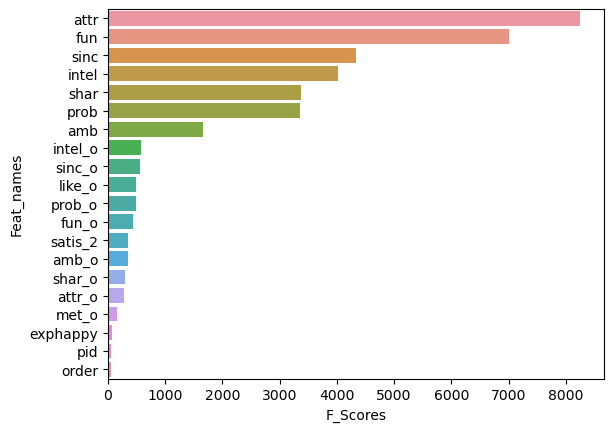

In [250]:
a=sns.barplot(ns_df_sorted,y="Feat_names",x="F_Scores")
#a.figure.set_size_inches(20,20)

In [251]:
ns_df_sorted

,Feat_names,F_Scores
10,attr,8256.324650
13,fun,7010.155600
11,sinc,4331.196472
12,intel,4021.923172
15,shar,3369.102140
16,prob,3362.642363
14,amb,1659.435951
3,intel_o,574.604871
2,sinc_o,550.136180
7,like_o,495.992904


Text(0.5, 1.0, 'NaN share of the observations per variable')

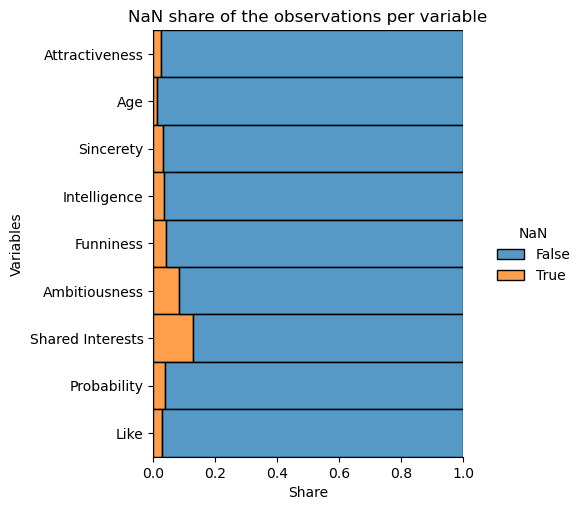

In [252]:
g=sns.displot(
    data=df.isna().melt(value_name="NaN"),
    y="variable",
    hue="NaN",
    multiple="fill",
)
g.set_axis_labels("Share", "Variables")
plt.title('NaN share of the observations per variable')

Drop NAs

In [253]:
df.isna().sum()

Attractiveness       202
Age                   95
Sincerety            277
Intelligence         296
Funniness            350
Ambitiousness        712
Shared Interests    1067
Probability          309
Like                 240
dtype: int64

In [254]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

Text(0.5, 1.0, 'NaN share of the observations per variable ')

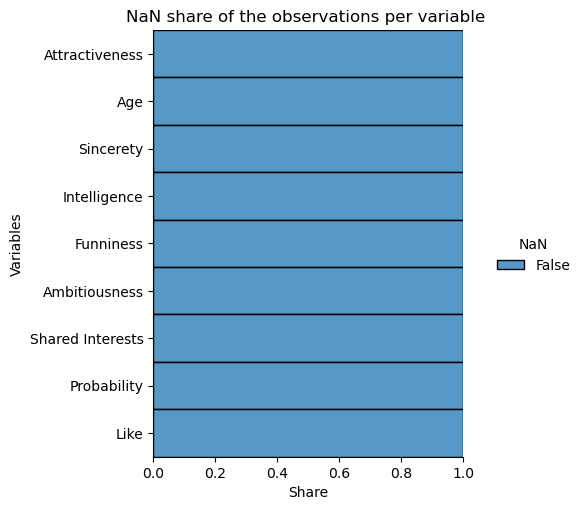

In [255]:
g=sns.displot(
    data=df.isna().melt(value_name="NaN"),
    y="variable",
    hue="NaN",
    multiple="fill",
)
g.set_axis_labels("Share", "Variables")
plt.title('NaN share of the observations per variable ')


### Variable lists

In [256]:
y_label = variables.pop()
features = variables

X = df[features]
y = df[y_label]

In [257]:
y_label

'Like'

In [258]:
features

['Attractiveness',
 'Age',
 'Sincerety',
 'Intelligence',
 'Funniness',
 'Ambitiousness',
 'Shared Interests',
 'Probability']

### Data splitting

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=42)

## Analysis

### Descriptive statistics

In [260]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Attractiveness,6885.0,6.190182,1.949666,0.0,5.0,6.0,8.0,10.0
Age,6885.0,26.226144,3.455303,18.0,24.0,26.0,28.0,55.0
Sincerety,6885.0,7.157734,1.743865,0.0,6.0,7.0,8.0,10.0
Intelligence,6885.0,7.350908,1.555328,0.0,6.0,7.0,8.0,10.0
Funniness,6885.0,6.393900,1.951725,0.0,5.0,7.0,8.0,10.0
Ambitiousness,6885.0,6.753740,1.795497,0.0,6.0,7.0,8.0,10.0
Shared Interests,6885.0,5.456282,2.142641,0.0,4.0,6.0,7.0,10.0
Probability,6885.0,5.246405,2.141773,0.0,4.0,5.0,7.0,10.0
Like,6885.0,6.129368,1.847897,0.0,5.0,6.0,7.0,10.0


### Exploratory data analysis

In [261]:
alt.Chart(df).mark_bar().encode(
    alt.X(alt.repeat("column"), type="quantitative", bin=True),
    y='count()',
).properties(
    width=150,
    height=150
).repeat(
    column=features
)

c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.RepeatChart(...)

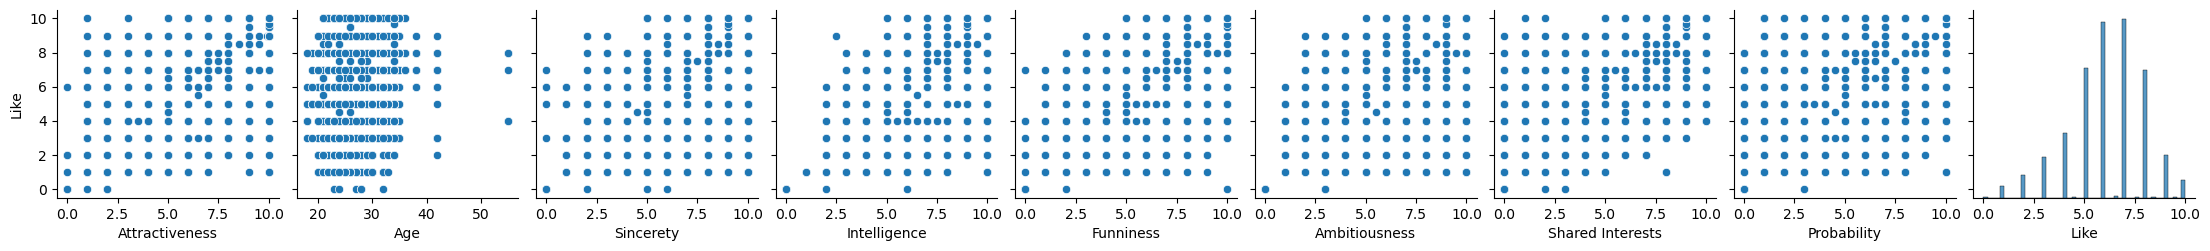

In [262]:
sns.pairplot(df, y_vars='Like')

<AxesSubplot: >

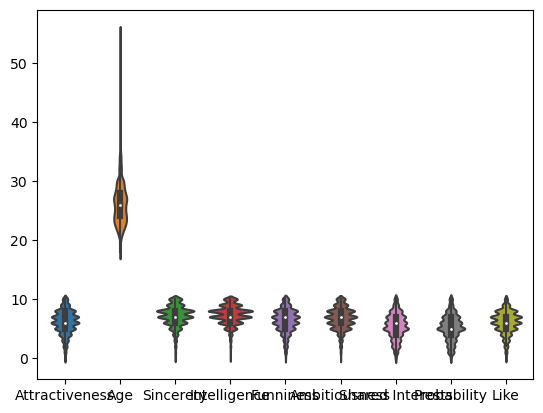

In [263]:
sns.violinplot(df)

<AxesSubplot: >

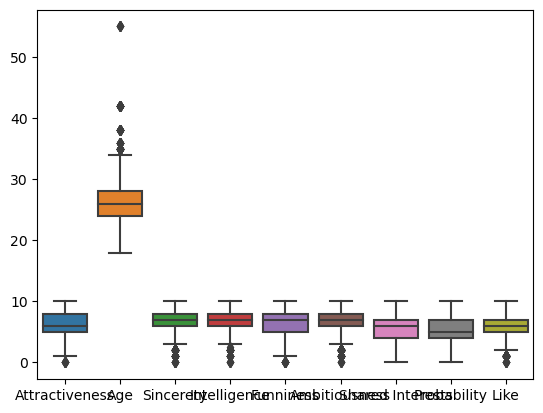

In [264]:
sns.boxplot(df)

### Relationships

In [265]:
# inspect correlation between outcome and possible predictors
corr = df.corr()
corr['Like'].sort_values(ascending=False)

Like                1.000000
Funniness           0.688160
Attractiveness      0.666656
Shared Interests    0.659300
Sincerety           0.521294
Intelligence        0.506557
Probability         0.485809
Ambitiousness       0.445592
Age                -0.000553
Name: Like, dtype: float64

In [266]:
corr.style.background_gradient(cmap='Blues')

,Attractiveness,Age,Sincerety,Intelligence,Funniness,Ambitiousness,Shared Interests,Probability,Like
Attractiveness,1.000000,0.014199,0.404977,0.385424,0.588031,0.356295,0.484558,0.277677,0.666656
Age,0.014199,1.000000,-0.012008,-0.011917,-0.016388,-0.036786,0.007673,-0.003389,-0.000553
Sincerety,0.404977,-0.012008,1.000000,0.666471,0.508834,0.463241,0.398298,0.333310,0.521294
Intelligence,0.385424,-0.011917,0.666471,1.000000,0.500007,0.627932,0.402560,0.280308,0.506557
Funniness,0.588031,-0.016388,0.508834,0.500007,1.000000,0.495026,0.615054,0.391965,0.688160
Ambitiousness,0.356295,-0.036786,0.463241,0.627932,0.495026,1.000000,0.435125,0.282169,0.445592
Shared Interests,0.484558,0.007673,0.398298,0.402560,0.615054,0.435125,1.000000,0.476802,0.659300
Probability,0.277677,-0.003389,0.333310,0.280308,0.391965,0.282169,0.476802,1.000000,0.485809
Like,0.666656,-0.000553,0.521294,0.506557,0.688160,0.445592,0.659300,0.485809,1.000000


## Model Regression

### Select model

In [267]:
# select the linear regression model
reg = LinearRegression()


### Training and validation Regression

In [268]:
scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error') *-1
# store cross-validation scores
df_scores = pd.DataFrame({"lr": scores})

# reset index to match the number of folds
df_scores.index += 1

# print dataframe
df_scores.style.background_gradient(cmap='Blues')

,lr
1,1.064278
2,1.084196
3,1.137445
4,1.140002
5,1.078186


In [269]:
alt.Chart(df_scores.reset_index()).mark_line(
     point=alt.OverlayMarkDef()
).encode(
    x=alt.X("index", bin=False, title="Fold", axis=alt.Axis(tickCount=5)),
    y=alt.Y("lr", aggregate="mean", title="Mean squared error (MSE)")
)

c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [270]:
df_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
lr,5.0,1.100821,0.035358,1.064278,1.078186,1.084196,1.137445,1.140002


### Fit model

In [271]:
# Fit the model to the data
reg.fit(X_train, y_train)

LinearRegression()

In [272]:
# intercept
intercept = pd.DataFrame({
    "Name": ["Intercept"],
    "Coefficient":[reg.intercept_]}
    )

# make a slope table
slope = pd.DataFrame({
    "Name": features,
    "Coefficient": reg.coef_}
)

# combine estimates of intercept and slopes
table = pd.concat([intercept, slope], ignore_index=True, sort=False)

round(table, 3)

,Name,Coefficient
0,Intercept,-0.281
1,Attractiveness,0.313
2,Age,0.001
3,Sincerety,0.089
4,Intelligence,0.110
5,Funniness,0.199
6,Ambitiousness,-0.019
7,Shared Interests,0.207
8,Probability,0.134


### Evaluation on test set

In [273]:
# obtain predictions
y_pred = reg.predict(X_test)

In [274]:
print(mean_absolute_error(y_test, y_pred).round(3))
mean_squared_error(y_test, y_pred, squared=False).round(3)
mean_squared_error(y_test, y_pred).round(3)
r2_score(y_test, y_pred).round(3)

0.814


0.641

In [275]:
importance = np.abs(reg.coef_)

df_imp = pd.DataFrame({"coeff": importance, 
                       "name": features,"reg":"MultiLinear"})
df_imp

,coeff,name,reg
0,0.312583,Attractiveness,MultiLinear
1,0.001283,Age,MultiLinear
2,0.089408,Sincerety,MultiLinear
3,0.110297,Intelligence,MultiLinear
4,0.199443,Funniness,MultiLinear
5,0.019165,Ambitiousness,MultiLinear
6,0.206805,Shared Interests,MultiLinear
7,0.134413,Probability,MultiLinear


### Save model



Save your model in the folder `models/`. Use a meaningful name and a timestamp.

In [276]:
folder = '../models/'
pkl_filename = 'clf_reg_20221222.pkl'

In [277]:
with open(folder + pkl_filename, 'wb') as file:
    pickle.dump(reg, file)

In [278]:
with open(folder + pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

pickle_model

LinearRegression()

# Model Lasso


In [279]:
lasso = LassoCV(cv=5,random_state=0,max_iter=15000)
lasso.fit(X_train,y_train)

LassoCV(cv=5, max_iter=15000, random_state=0)

In [280]:
lasso.alpha_

0.002628021155206215

In [281]:
# Set best alpha
lasso_best = Lasso(alpha=lasso.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.002628021155206215)

In [282]:
print(list(zip(lasso_best.coef_, X)))

[(0.3122430230678835, 'Attractiveness'), (0.001103611339266833, 'Age'), (0.08917830689558476, 'Sincerety'), (0.10818407431618833, 'Intelligence'), (0.19901504251868193, 'Funniness'), (-0.016477033620339386, 'Ambitiousness'), (0.20648665020516752, 'Shared Interests'), (0.13408575305638026, 'Probability')]


In [283]:
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 68.12
R squared test set 64.06


In [284]:
mean_squared_error(y_test, lasso_best.predict(X_test))

1.1866404503098331

In [285]:
importance = np.abs(lasso_best.coef_)

df_lasso = pd.DataFrame({"coeff": importance, 
                       "name": features,"reg":"Lasso"})
df_lasso
dfdisplay=pd.concat([df_imp,df_lasso])

(0.0018604964981005724,
 3.712178549791642,
 0.9429866547867045,
 3.6234047909804574)

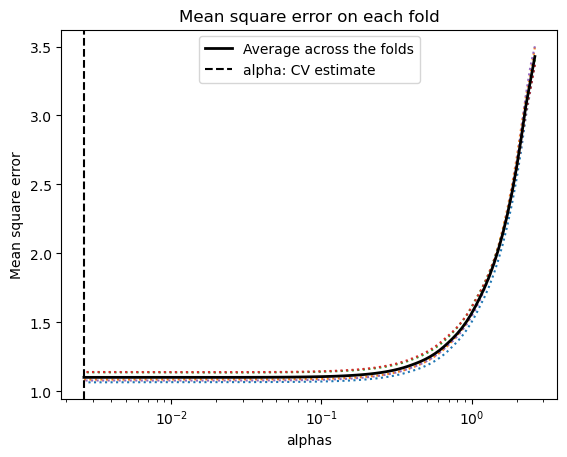

In [286]:
plt.semilogx(lasso.alphas_, lasso.mse_path_, ":")
plt.plot(
    lasso.alphas_ ,
    lasso.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    lasso.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")


# XG Boost

In [287]:
regxg= xg.XGBRegressor(eval_metric='rmsle',booster='gblinear')

In [288]:
regxgnolin= xg.XGBRegressor(eval_metric='rmsle')

In [289]:
param_grid = { "n_estimators": [100,500, 600, 700],
              "learning_rate": [0.01, 0.015,0.08,0.5]}

In [290]:
param_grid_nolinear = {"max_depth": [2,5, 8, 10],
              "n_estimators": [100,500, 600, 700],
              "learning_rate": [0.01, 0.015,0.08,0.5]}

In [291]:
searchnolinear = GridSearchCV(regxgnolin, param_grid_nolinear, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",searchnolinear.best_params_)

The best hyperparameters are  {'learning_rate': 0.08, 'max_depth': 2, 'n_estimators': 500}


In [292]:
search = GridSearchCV(regxg, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\sklearn\base.py", line 721, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\sklearn\metrics\_regression.py", line 911, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\sklearn\me

The best hyperparameters are  {'learning_rate': 0.08, 'n_estimators': 700}


c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\sklearn\base.py", line 721, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\sklearn\metrics\_regression.py", line 911, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\sklearn\me

In [293]:
regxg=xg.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],booster='gblinear')
                          # max_depth     = search.best_params_["max_depth"],booster='gblinear')

regxg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=-1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=700, n_jobs=0, num_parallel_tree=None, predictor=None,
             random_state=0, ...)

In [294]:
regxgnolin=xg.XGBRegressor(learning_rate = searchnolinear.best_params_["learning_rate"],
                           n_estimators  = searchnolinear.best_params_["n_estimators"],
                           max_depth = searchnolinear.best_params_["max_depth"])

regxgnolin.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.08, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [295]:
predictionsnolin = regxgnolin.predict(X_test)

In [296]:
predictions = regxg.predict(X_test)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

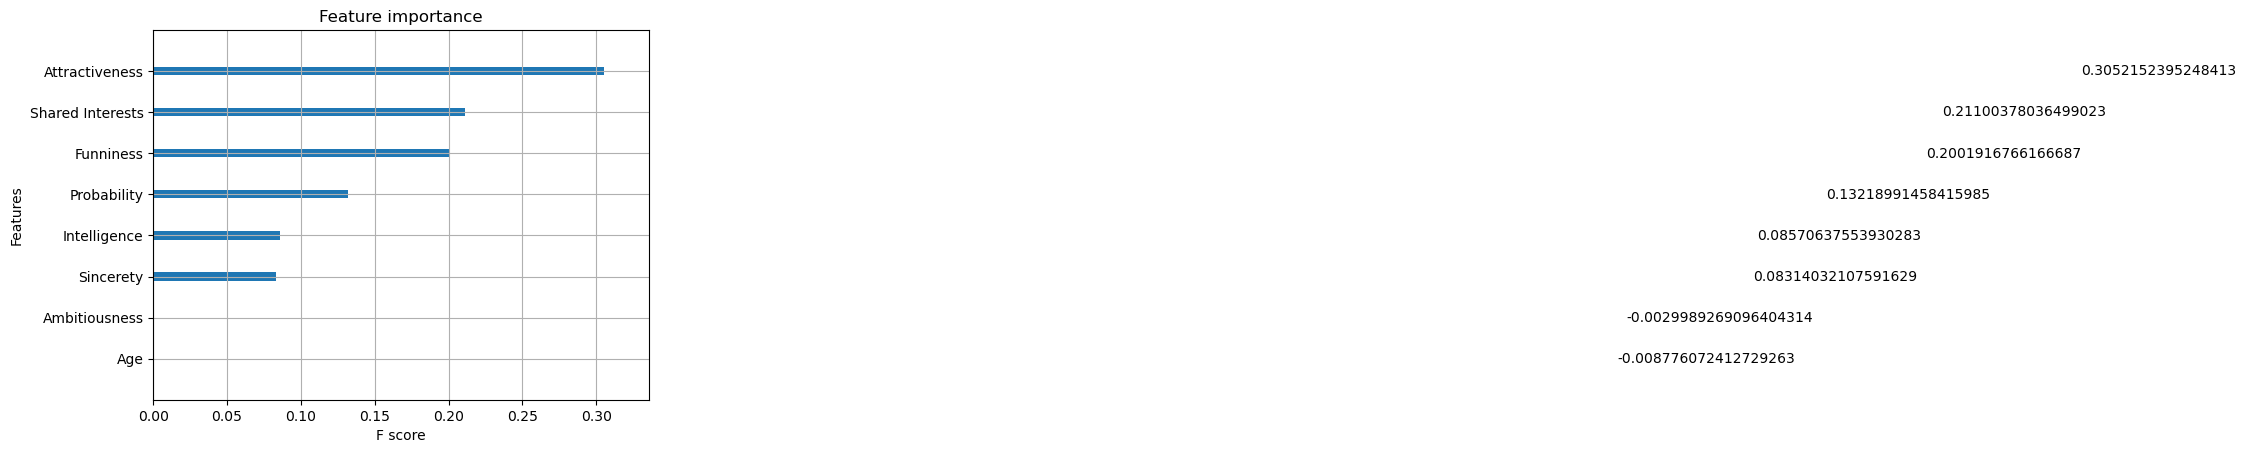

In [297]:
xg.plot_importance(regxg)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

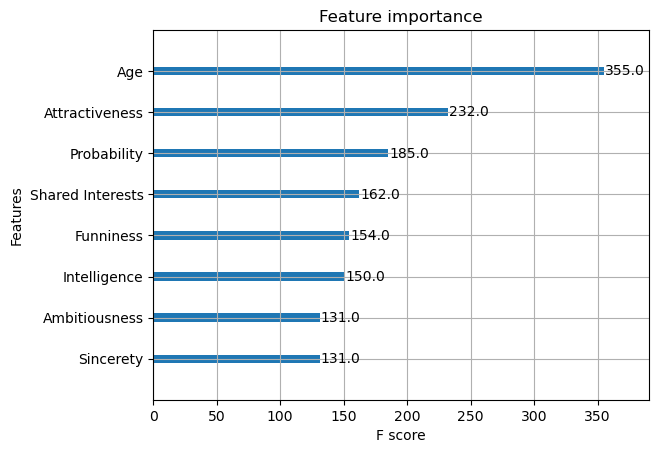

In [298]:
xg.plot_importance(regxgnolin)

In [299]:
imp= regxgnolin.get_booster().get_score()
imp

{'Attractiveness': 232.0,
 'Age': 355.0,
 'Sincerety': 131.0,
 'Intelligence': 150.0,
 'Funniness': 154.0,
 'Ambitiousness': 131.0,
 'Shared Interests': 162.0,
 'Probability': 185.0}

Can only display coefficients for the Linear Part of XGBoost

In [300]:
regxg.coef_
importance = np.abs(regxg.coef_)

df_xgboost = pd.DataFrame({"coeff": importance, 
                       "name": features,"reg":"XGBoost"})
df_xgboost
dfdisplay=pd.concat([df_imp,df_lasso,df_xgboost
])

# Model Comparison

In [301]:
Compdf = pd.DataFrame({"Type": ["MAE", "RMSE", "MSE", "R2", "MAE", "RMSE", "MSE", "R2", "MAE", "RMSE", "MSE", "R2", "MAE", "RMSE", "MSE", "R2"],
 "Values": [mean_absolute_error(y_test, y_pred).round(3), mean_squared_error(y_test, y_pred, squared=False).round(3), mean_squared_error(y_test, y_pred).round(
    3), r2_score(y_test, y_pred).round(3), mean_absolute_error(y_test, lasso_best.predict(X_test)).round(3), mean_squared_error(y_test, lasso_best.predict(X_test), squared=False).round(3), mean_squared_error(y_test, lasso_best.predict(X_test)).round(3), r2_score(y_test, lasso_best.predict(X_test)).round(3),
    mean_absolute_error(y_test, predictions).round(3), mean_squared_error(y_test, predictions, squared=False).round(3), mean_squared_error(y_test, predictions).round(
    3), r2_score(y_test, predictions).round(3), mean_absolute_error(y_test, predictionsnolin).round(3), mean_squared_error(y_test, predictionsnolin, squared=False).round(3), mean_squared_error(y_test, predictionsnolin).round(
    3), r2_score(y_test, predictionsnolin).round(3)],"Model":["Multiple Regresion","Multiple Regresion","Multiple Regresion","Multiple Regresion","Lasso","Lasso","Lasso","Lasso","XGBOOST","XGBOOST","XGBOOST","XGBOOST","XGBOOST_NO_LINEAR","XGBOOST_NO_LINEAR","XGBOOST_NO_LINEAR","XGBOOST_NO_LINEAR"]})


In [302]:
Compdf

,Type,Values,Model
0,MAE,0.814,Multiple Regresion
1,RMSE,1.089,Multiple Regresion
2,MSE,1.187,Multiple Regresion
3,R2,0.641,Multiple Regresion
4,MAE,0.813,Lasso
5,RMSE,1.089,Lasso
6,MSE,1.187,Lasso
7,R2,0.641,Lasso
8,MAE,0.811,XGBOOST
9,RMSE,1.088,XGBOOST


<AxesSubplot: xlabel='Values', ylabel='Type'>

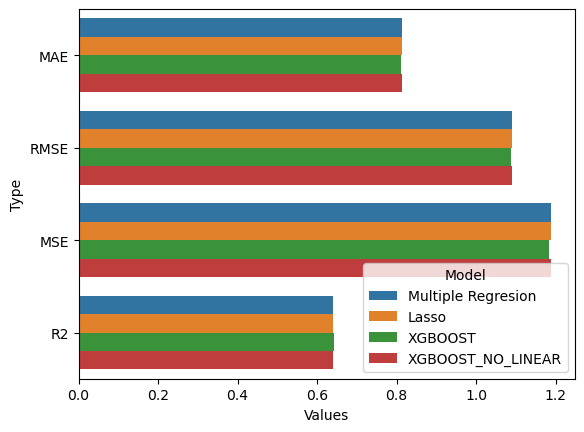

In [303]:
sns.barplot(Compdf,y="Type",x="Values",hue="Model")

<AxesSubplot: xlabel='coeff', ylabel='name'>

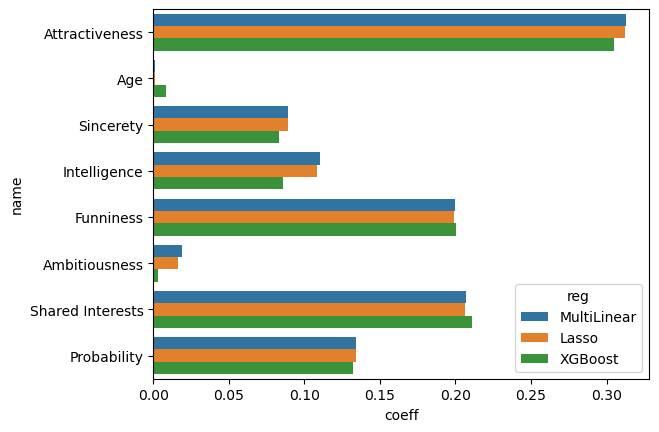

In [304]:
sns.barplot(dfdisplay,y="name",x="coeff",hue="reg")

In [305]:
dfscatter_Multilin= pd.DataFrame({'True Values':y_test,"Predicted Values":reg.predict(X_test),"type":"Multilinear"})
dfscatter_Lasso= pd.DataFrame({'True Values':y_test,"Predicted Values":lasso_best.predict(X_test),"type":"Lasso"})
dfscatter_XGboost=pd.DataFrame({'True Values':y_test,"Predicted Values":predictions,"type":"XGBOOST"})
dfscatter_XGboostnolin=pd.DataFrame({'True Values':y_test,"Predicted Values":predictionsnolin,"type":"XGBOOSTnolin"})
dfscatter=pd.concat([dfscatter_Multilin,dfscatter_Lasso,dfscatter_XGboost,dfscatter_XGboostnolin])

<AxesSubplot: xlabel='True Values', ylabel='Predicted Values'>

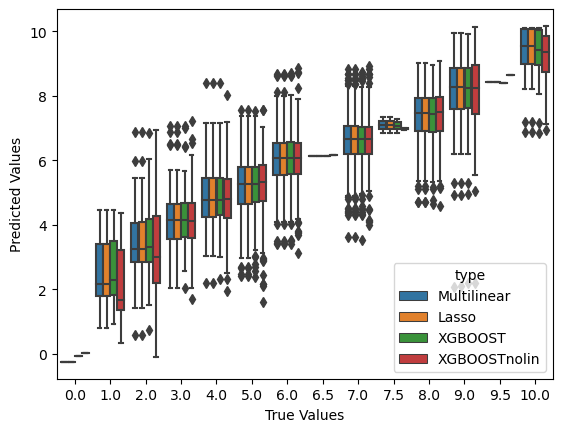

In [306]:
sns.boxplot(dfscatter,hue="type",x="True Values",y="Predicted Values")

# Conclusions

- All Four algoryhms define Attractiveness as Main Factor to be Liked